This dataset includes data on adult's diet, physical activity, and weight status from Behavioral Risk Factor Surveillance System. This data is used for DNPAO's Data, Trends, and Maps database, which provides national and state specific data on obesity, nutrition, physical activity, and breastfeeding.

In [1]:
import numpy as np # math arrays manipulation
import pandas as pd # for data management
import matplotlib.pyplot as plt #plots
import seaborn as sns #plots

In [2]:
# conda install -c conda-forge statsmodels

In [67]:
df=pd.read_csv("Nutrition.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [69]:
df.iloc[1]

YearStart                                                                  2011
YearEnd                                                                    2011
LocationAbbr                                                                 AL
LocationDesc                                                            Alabama
Datasource                           Behavioral Risk Factor Surveillance System
Class                                                   Obesity / Weight Status
Topic                                                   Obesity / Weight Status
Question                      Percent of adults aged 18 years and older who ...
Data_Value_Unit                                                             NaN
Data_Value_Type                                                           Value
Data_Value                                                                 32.3
Data_Value_Alt                                                             32.3
Data_Value_Footnote_Symbol              

In [70]:
for f in ['Sample_Size','YearStart','YearEnd']:
    print(f)
    print(df[f].unique())
    print("\n")

Sample_Size
[ 7304.  2581.  4723. ... 11672.  2884.  4547.]


YearStart
[2011 2012 2014 2013 2015 2016]


YearEnd
[2011 2012 2014 2013 2015 2016]




In [76]:
#removing unwanted and repeated columns
df=df.drop(['Low_Confidence_Limit','High_Confidence_Limit ','YearEnd','Topic','Class','Datasource','Data_Value_Unit','QuestionID','TopicID','DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol','Data_Value_Footnote','StratificationCategoryId1','StratificationID1'],axis=1);

KeyError: "['Low_Confidence_Limit', 'High_Confidence_Limit ', 'YearEnd', 'Topic', 'Class', 'Datasource', 'Data_Value_Unit', 'QuestionID', 'TopicID', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'StratificationCategoryId1', 'StratificationID1'] not found in axis"

In [72]:
# Narrowing down to Obesity WRT Income

In [73]:
for f in ['StratificationCategory1','Stratification1']:
    print(f)
    print(df[f].unique())
    print("\n")

StratificationCategory1
['Total' 'Gender' 'Education' 'Age (years)' 'Income' 'Race/Ethnicity']


Stratification1
['Total' 'Male' 'Female' 'Less than high school' 'High school graduate'
 'Some college or technical school' 'College graduate' '18 - 24' '25 - 34'
 '35 - 44' '45 - 54' '55 - 64' '65 or older' 'Less than $15,000'
 '$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' 'Data not reported'
 'Non-Hispanic White' 'Non-Hispanic Black' 'Hispanic' 'Asian'
 'Hawaiian/Pacific Islander' 'American Indian/Alaska Native'
 '2 or more races' 'Other']




In [74]:
df=df[df['ClassID']=='OWS']

In [75]:
df=df[df['StratificationCategory1']=='Income']

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480 entries, 13 to 51843
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                4480 non-null   int64  
 1   LocationAbbr             4480 non-null   object 
 2   LocationDesc             4480 non-null   object 
 3   Question                 4480 non-null   object 
 4   Data_Value               4480 non-null   float64
 5   Data_Value_Alt           4480 non-null   float64
 6   Sample_Size              4480 non-null   float64
 7   Total                    0 non-null      object 
 8   Age(years)               0 non-null      object 
 9   Education                0 non-null      object 
 10  Gender                   0 non-null      object 
 11  Income                   4480 non-null   object 
 12  Race/Ethnicity           0 non-null      object 
 13  GeoLocation              4396 non-null   object 
 14  ClassID               

In [80]:
df=df.drop(['StratificationCategory1','Stratification1','ClassID','LocationDesc','Data_Value_Alt','Age(years)','Education','Gender','Race/Ethnicity','LocationID','StratificationCategory1','Stratification1'],axis=1)

In [81]:
len(df)

4480

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480 entries, 13 to 51843
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearStart     4480 non-null   int64  
 1   LocationAbbr  4480 non-null   object 
 2   Question      4480 non-null   object 
 3   Data_Value    4480 non-null   float64
 4   Sample_Size   4480 non-null   float64
 5   Total         0 non-null      object 
 6   Income        4480 non-null   object 
 7   GeoLocation   4396 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 315.0+ KB


In [83]:
df=df.drop(['GeoLocation'],axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480 entries, 13 to 51843
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearStart     4480 non-null   int64  
 1   LocationAbbr  4480 non-null   object 
 2   Question      4480 non-null   object 
 3   Data_Value    4480 non-null   float64
 4   Sample_Size   4480 non-null   float64
 5   Total         0 non-null      object 
 6   Income        4480 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 280.0+ KB


In [86]:
df.corr()

,YearStart,Data_Value,Sample_Size
YearStart,1.000000,0.070193,-0.013898
Data_Value,0.070193,1.000000,-0.009592
Sample_Size,-0.013898,-0.009592,1.000000


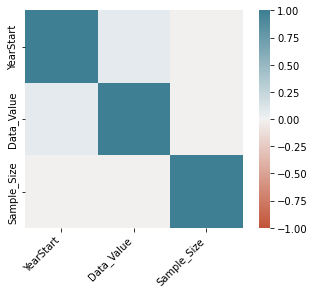

In [88]:
data = df

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [91]:
df = pd.get_dummies(data=df, drop_first=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4480 entries, 13 to 51843
Data columns (total 64 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   YearStart                                                            4480 non-null   int64  
 1   Data_Value                                                           4480 non-null   float64
 2   Sample_Size                                                          4480 non-null   float64
 3   LocationAbbr_AL                                                      4480 non-null   uint8  
 4   LocationAbbr_AR                                                      4480 non-null   uint8  
 5   LocationAbbr_AZ                                                      4480 non-null   uint8  
 6   LocationAbbr_CA                                                      4480 non-null   uint8  
 7   Loca

Question


KeyError: 'Question'

In [94]:
def OSR2(model, df_train, df_test, dependent_var):   
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test.loc[:, df_test.columns != dependent_var])
    RSS = np.sum((y_test - y_pred)**2)
    TSS = np.sum((y_test - np.mean(df_test[dependent_var]))**2)    

    return 1 - RSS/TSS

## Compute Out-of-sample adjusted R-squared using the test set

def adjOSR2(model, df_train, df_test, dependent_var): 
    n = df_train.shape[0]
    k = len(df_test.columns) -1
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test.loc[:, df_test.columns != dependent_var])
    RSS = np.sum((y_test - y_pred)**2)
    TSS = np.sum((y_test - np.mean(df_test[dependent_var]))**2)    

    return 1 - (RSS/TSS)*(n-1)/(n-k-1)


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=25)

In [97]:
print(f"No. of training examples: {df_train.shape[0]}")
print(f"No. of testing examples: {df_test.shape[0]}")

No. of training examples: 3584
No. of testing examples: 896


In [102]:
from sklearn.linear_model import LinearRegression


In [103]:
X_train = df_train.drop(['Data_Value'],axis=1)
y_train = df_train['Data_Value']

model1 = LinearRegression().fit(X_train, y_train)

In [104]:
R_squared = model1.score(X_train, y_train)
#how well your beta values represent the model
print('R_squared:', R_squared)

intercept = model1.intercept_
coefficients = model1.coef_

print('Intercept:', intercept)
print('Coefficients:', coefficients)
#beta values it calculated

# # compute out-of-sample R_squared
X_test = df_test.drop(['Data_Value'],axis=1)
y_test = df_test['Data_Value']

df_predictions = model1.predict(X_test)
OSR_squared = model1.score(X_test, y_test)
print(OSR_squared)

R_squared: 0.45181817773607
Intercept: -388.85603721538035
Coefficients: [ 2.10608997e-01 -2.27787378e-05  2.13371632e+00  2.46533126e+00
 -1.57335091e-01 -1.27796297e+00 -3.12384423e+00 -5.84373019e-01
 -4.04679451e+00  1.31793673e+00 -3.81062026e-01  9.10062022e-01
  2.82062934e-02 -4.46712668e+00  1.17571936e+00  8.28959181e-02
 -1.24505826e-01  1.35615590e+00  1.04402785e+00  1.78203274e+00
  2.78832878e+00 -1.48085665e+00  8.04982430e-01  4.69033773e-01
  1.04973286e+00 -3.17822222e-01  1.01241187e+00  3.63579861e+00
 -1.26108838e+00  1.17533804e+00  1.12148700e+00  1.10054769e+00
 -3.31118674e-01 -9.40742445e-02 -1.59031280e-01 -4.91740166e-01
 -1.61629185e+00  1.11686215e+00  2.33794239e+00 -9.03250310e-01
  4.15236495e-01  1.75175580e+00 -1.41018247e-01  1.58757671e+00
  7.86315711e-01  2.08547682e+00  1.50163973e+00  1.55210036e+00
 -2.71527519e+00  9.48278392e-02  1.01351968e+00 -1.34468018e+00
 -5.26349653e-01  9.63386258e-01  3.15698685e+00 -1.98268347e-01
 -5.48031377e+00 

In [105]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(df, columns):
    
    values = sm.add_constant(df[columns]).values  # the dataframe passed to VIF must include the intercept term. We add it the same way we did before.
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    
    return pd.Series(vif[1:], index=columns)

In [ ]:
cols = ['']
VIF(wine_train, cols)